In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]]


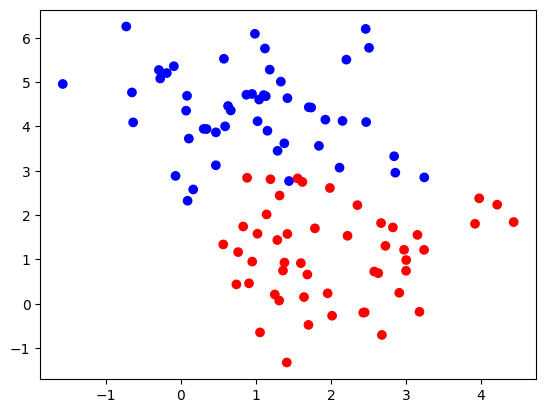

In [8]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))
print(y)
plt.scatter(X[:,0], X[:, 1], c=y, cmap='bwr')

In [18]:
class RandriaLogisticReg:
    def initialisation(X):
        W=np.random.randn(X.shape[1],1)
        b=np.random.randn(1)
        return (W,b)
    def sigmoid(Z):
        return 1 / (1 + np.exp(-Z))
    def foward_prop(X,W,b):
        Z=X.dot(W)+b
        return RandriaLogisticReg.sigmoid(Z)
    def log_loss(A,y):
        return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
    def gradients(X, A, y):
        dW = 1/len(y) * np.dot(X.T, A - y)
        db = 1/len(y) * np.sum(A - y)
        return (dW, db)
    def optimisation(X, W, b, A, y, learning_rate):
        dW, db = RandriaLogisticReg.gradients(X, A, y)
        W = W - learning_rate * dW
        b = b - learning_rate * db
        return (W, b)
    def predict(X, W, b):
        A = RandriaLogisticReg.foward_prop(X, W, b)
        return A >= 0.5
    def regression_logistique(X, y, learning_rate=0.1, n_iter=100):
  
        # Initialisation
        W, b = RandriaLogisticReg.initialisation(X)

        # Entrainement
        for i in range(n_iter):
            A = RandriaLogisticReg.foward_prop(X, W, b)
            W, b = RandriaLogisticReg.optimisation(X, W, b, A, y, learning_rate=0.1)
        return (W,b)

### TRAINNING

In [19]:
NW,Nb=RandriaLogisticReg.regression_logistique(X,y,0.1,100)

In [20]:
def visualisation(X, y, W, b):
  resolution = 300
  fig, ax = plt.subplots(figsize=(9, 6))
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')

  #limites du graphique
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # meshgrid
  x1 = np.linspace(xlim[0], xlim[1], resolution)
  x2 = np.linspace(ylim[0], ylim[1], resolution)
  X1, X2 = np.meshgrid(x1, x2)

  # assembler les 2 variables
  XX = np.vstack((X1.ravel(), X2.ravel())).T

  # Prédictions
  Z = RandriaLogisticReg.predict(XX, W, b)
  Z = Z.reshape((resolution, resolution))

  ax.pcolormesh(X1, X2, Z, zorder=0, alpha=0.1)
  ax.contour(X1, X2, Z, colors='g')

### VISUALISATION

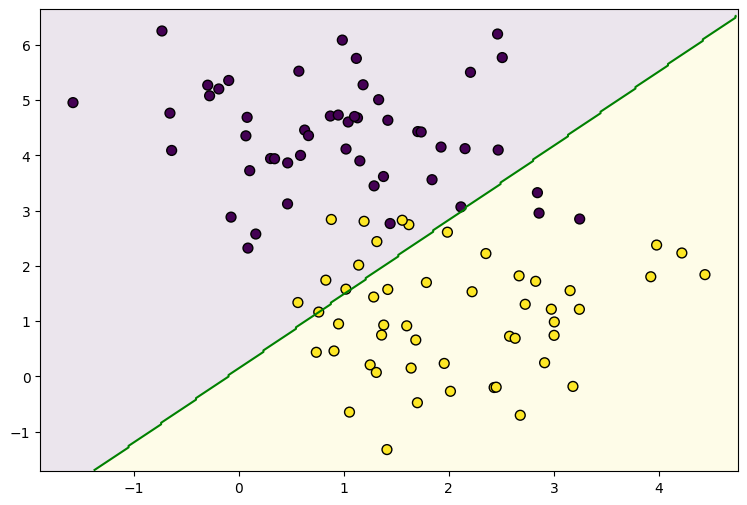

In [21]:
visualisation(X,y,NW,Nb)

In [1]:
import numpy as np

class RandriaLogisticRegL1:
    def __init__(self, learning_rate=0.001, n_iter=5000, l1=3.0):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.l1 = l1
        self.costs = []

    def initialize_weights(self, X):
        """Initialize weights and bias."""
        W = np.random.randn(X.shape[1]) / np.sqrt(X.shape[1])
        b = 0.0
        return W, b

    @staticmethod
    def sigmoid(Z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-Z))

    def compute_cost(self, Yhat, Y, W):
        """Compute the cost with L1 regularization."""
        m = len(Y)
        log_loss = -(Y * np.log(Yhat) + (1 - Y) * np.log(1 - Yhat)).mean()
        l1_penalty = self.l1 * np.abs(W).mean()
        return log_loss + l1_penalty

    def fit(self, X, Y):
        """Train the model."""
        W, b = self.initialize_weights(X)
        
        # Ensure Y is a 1D array
        Y = Y.ravel()

        for t in range(self.n_iter):
            # Forward propagation
            Z = X.dot(W) + b
            Yhat = self.sigmoid(Z)

            # Compute the cost
            cost = self.compute_cost(Yhat, Y, W)
            self.costs.append(cost)

            # Backpropagation and optimization
            dW, db = self.gradients(X, Yhat, Y, W)
            W -= self.learning_rate * dW
            b -= self.learning_rate * db

        self.W = W
        self.b = b

    def gradients(self, X, Yhat, Y, W):
        """Compute the gradients for weights and bias."""
        m = len(Y)
        delta = Yhat - Y  # Ensure delta is 1D
        dW = (X.T.dot(delta) / m) + self.l1 * np.sign(W) / m
        db = delta.mean()
        return dW, db


    def predict(self, X):
        """Make predictions."""
        Z = X.dot(self.W) + self.b
        Yhat = self.sigmoid(Z)
        return (Yhat >= 0.5).astype(int)


In [9]:
model = RandriaLogisticRegL1(learning_rate=0.001, n_iter=5000, l1=3.0)
model.fit(X, y)

ValueError: operands could not be broadcast together with shapes (2,100) (2,) 